In [1]:
import pandas as pd
import matplotlib.pylab as plt
 
import numpy as np
import pyWDFml.classify
%matplotlib inline
# Alternatives include bmh, fivethirtyeight, ggplot,
# dark_background, seaborn-deep, etc
plt.style.use('ggplot') 
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['figure.figsize'] = (14, 10)
 
colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
colors = np.hstack([colors] * 20)

In [2]:
direc='/home/cuoco/CleanWorks/WDF/wdfml/wdfml/output/H1:GDS-CALIB_STRAIN_1167559536/' 
fileIn='WDFTrigger-H1:GDS-CALIB_STRAIN-GPS1167559536-AR3000-Win2048-Ov2000-SNR5.csv'
 
infile=direc+fileIn
triggers = pd.read_csv(infile, index_col=False)
 

In [3]:
triggers.head(10)

,Duration,FreqMax,GPSMax,GPSstart,SNRMax,WavCoeff,WaveletFam
0,0.0,1512.0,1.167560e+09,1.167560e+09,5.004543,"(0, 537)\t-2.8645111906e-21\n (0, 571)\t1.2...",DCT
1,0.0,1512.0,1.167560e+09,1.167560e+09,5.381653,"(0, 345)\t-3.64203103656e-22\n (0, 535)\t-2...",DCT
2,0.0,1513.0,1.167560e+09,1.167560e+09,5.157118,"(0, 345)\t-1.82700362084e-23\n (0, 516)\t2....",DCT
3,0.0,1513.0,1.167560e+09,1.167560e+09,5.154993,"(0, 516)\t1.08311156907e-21\n (0, 537)\t3.2...",DCT
4,0.0,1512.0,1.167560e+09,1.167560e+09,5.186187,"(0, 344)\t6.84304583066e-22\n (0, 516)\t4.0...",DCT
5,0.0,537.0,1.167560e+09,1.167560e+09,5.370526,"(0, 344)\t1.22526202146e-21\n (0, 537)\t-4....",DCT
6,0.0,1971.0,1.167560e+09,1.167560e+09,5.378642,"(0, 358)\t-1.18498061856e-21\n (0, 360)\t2....",DCT
7,0.0,1498.0,1.167560e+09,1.167560e+09,5.465134,"(0, 359)\t-1.97844305659e-21\n (0, 508)\t-1...",DCT
8,0.0,1498.0,1.167560e+09,1.167560e+09,5.224639,"(0, 360)\t-1.36333227643e-21\n (0, 368)\t-1...",DCT
9,0.0,1499.0,1.167560e+09,1.167560e+09,6.140598,"(0, 358)\t-2.79439915016e-22\n (0, 360)\t1....",DCT


In [4]:
triggers['WaveletFam'].unique()

array(['DCT'], dtype=object)

(301, 7)


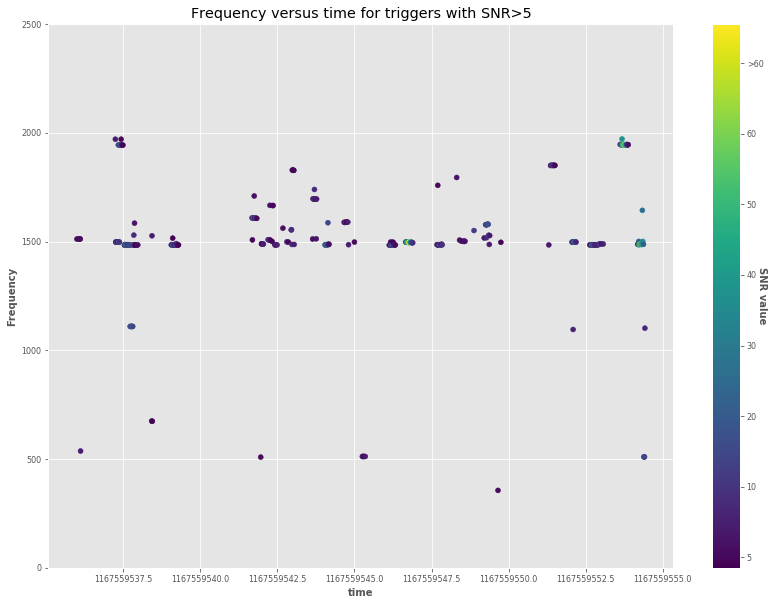

In [5]:
 
print (triggers.shape)
 
from matplotlib.ticker import FormatStrFormatter
color = [str(item/255.) for item in triggers.SNRMax]
sc = plt.scatter(triggers.GPSMax,
                 triggers.FreqMax, s=25, \
                 c=color)
# legend
cbar = plt.colorbar(sc)
cbar.ax.set_yticklabels(['5','10', '20', '30', '40', '50', '60','>60'])
cbar.set_label('SNR value', rotation=270)

plt.ylim(0, 2500)
 
plt.gca().get_xaxis().get_major_formatter().set_useOffset(False)
plt.gca().get_xaxis().get_major_formatter().set_scientific(False)
plt.xlabel("time")
plt.ylabel("Frequency")
plt.title("Frequency versus time for triggers with SNR>5")

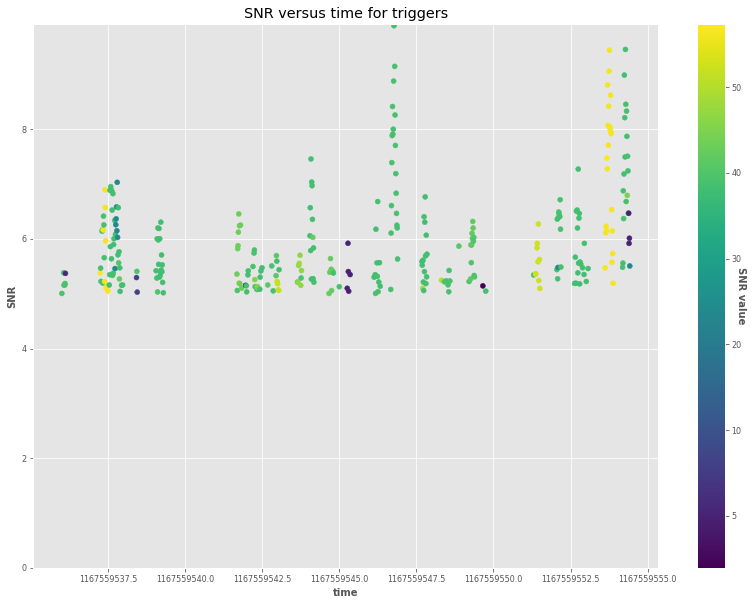

In [6]:
color = [str(item/255.) for item in triggers.FreqMax]
sc = plt.scatter(triggers.GPSMax,
                 triggers.SNRMax, s=25, \
                 c=color)
# legend
cbar = plt.colorbar(sc)
cbar.ax.set_yticklabels(['5','10', '20', '30', '40', '50', '60','>60'])
cbar.set_label('SNR value', rotation=270)

plt.ylim(0, max(triggers.SNRMax))
 
plt.gca().get_xaxis().get_major_formatter().set_useOffset(False)
plt.gca().get_xaxis().get_major_formatter().set_scientific(False)
plt.xlabel("time")
plt.ylabel("SNR")
plt.title("SNR versus time for triggers")

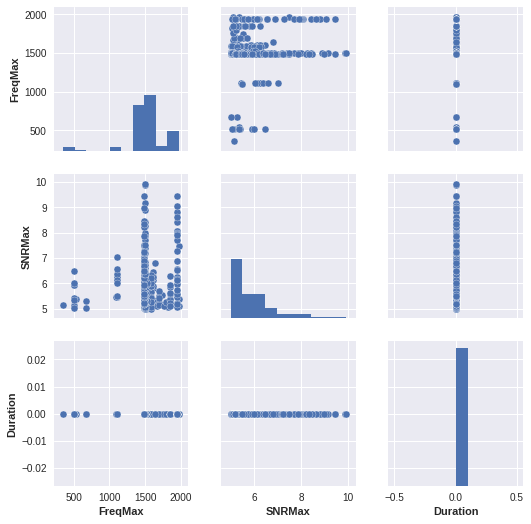

In [7]:
import seaborn as sns
metatriggers=triggers[['FreqMax','SNRMax','Duration']]
sns.pairplot(metatriggers)

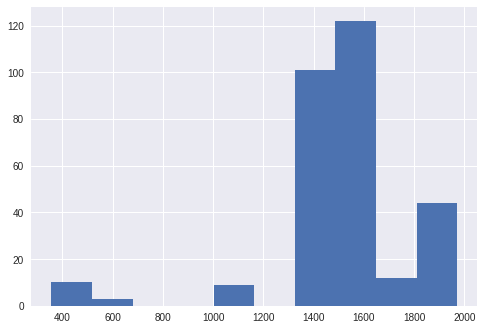

In [8]:
triggers['FreqMax'].hist()

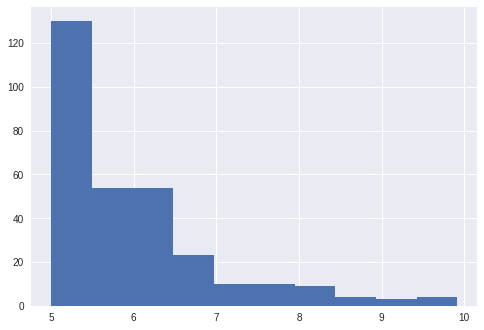

In [9]:
triggers['SNRMax'].hist()

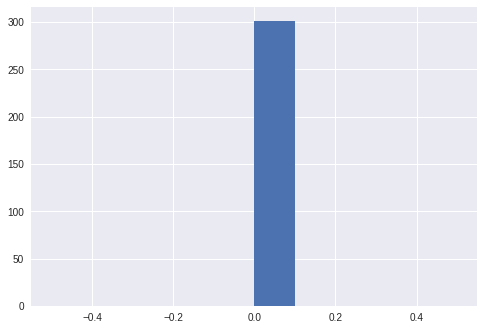

In [10]:
triggers['Duration'].hist()

In [11]:
triggers.dtypes

Duration      float64
FreqMax       float64
GPSMax        float64
GPSstart      float64
SNRMax        float64
WavCoeff       object
WaveletFam     object
dtype: object

In [15]:
df=pd.DataFrame(triggers['WavCoeff'].values)

In [16]:
df.head(10)

,0
0,"(0, 537)\t-2.8645111906e-21\n (0, 571)\t1.2..."
1,"(0, 345)\t-3.64203103656e-22\n (0, 535)\t-2..."
2,"(0, 345)\t-1.82700362084e-23\n (0, 516)\t2...."
3,"(0, 516)\t1.08311156907e-21\n (0, 537)\t3.2..."
4,"(0, 344)\t6.84304583066e-22\n (0, 516)\t4.0..."
5,"(0, 344)\t1.22526202146e-21\n (0, 537)\t-4...."
6,"(0, 358)\t-1.18498061856e-21\n (0, 360)\t2...."
7,"(0, 359)\t-1.97844305659e-21\n (0, 508)\t-1..."
8,"(0, 360)\t-1.36333227643e-21\n (0, 368)\t-1..."
9,"(0, 358)\t-2.79439915016e-22\n (0, 360)\t1...."


In [19]:
from scipy.sparse import hstack
X_train_dtm = hstack((X_train_dtm,np.array(df)[:,None]))

NameError: name 'X_train_dtm' is not defined

In [17]:
X = np.asarray(df)
print (X.shape)
pca_comp=10
spectral_emb=2
n_neighbors=15
ml = pyWDFml.classify.WDFMLClassify(X)
#ml.PreprocessingSparsePCA(pca_comp,spectral_emb,n_neighbors)
ml.PreprocessingPCA(pca_comp,spectral_emb,n_neighbors,whiten=True)
#ml.PreprocessingEmb(spectral_emb,n_neighbors)
#ml.PreprocessingRBM(pca_comp,spectral_emb,n_neighbors)
ml.Classify(10)
#plt.figure(0)
#plt.plot(ml.pca.explained_variance_)
ml.PlotClustering()

# write results on file
outfile = direc+'H1-Clustered-Type-2048Hz-SNR4.txt'

dfjo = pd.DataFrame(
    dict(GPSMax=triggers['GPSMax'].values, FreqMax=triggers['FreqMax'].values, SNRMax=triggers['SNRMax'].values,
         GPSstart=triggers['GPSstart'].values,Duration=triggers['Duration'], WaveletFam=triggers['WaveletFam'],LABEL=ml.labels.astype(int)),
    columns=['GPSMax', 'FreqMax','SNRMax', 'GPSstart','Duration','WaveletFam','LABEL'])

dfjo.to_csv(outfile, index_label='ID',float_format='%.5f')



# legend
groups = dfjo.groupby('LABEL')
# Plot
fig, ax = plt.subplots(figsize=(12, 8))
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.GPSMax, group.FreqMax, marker='o', linestyle='', ms=7, label=name)
ax.legend()
ax.get_xaxis().get_major_formatter().set_useOffset(False)
ax.get_xaxis().get_major_formatter().set_scientific(False)
plt.show()

(301, 1)


ValueError: could not convert string to float: '  (0, 502)\t-9.6045268035e-23\n  (0, 504)\t9.35563510547e-22\n  (0, 510)\t-4.09172141804e-21\n  (0, 512)\t1.55109537496e-21\n  (0, 519)\t-1.65214145285e-22\n  (0, 572)\t-2.25936271431e-22\n  (0, 881)\t-1.10050854533e-22\n  (0, 883)\t1.2374139823e-21\n  (0, 1094)\t-3.07462815643e-22\n  (0, 1096)\t1.42542562431e-23\n  (0, 1102)\t4.32263974174e-21\n  (0, 1104)\t-2.4795757287e-22\n  (0, 1487)\t-2.2736540575e-21\n  (0, 1489)\t1.36253662133e-21\n  (0, 1501)\t3.46494018442e-21\n  (0, 1537)\t-2.59286123269e-21\n  (0, 1539)\t1.1438667198e-21\n  (0, 1644)\t-2.8557730971e-21\n  (0, 1646)\t9.50268900109e-22\n  (0, 1749)\t5.772430676e-22\n  (0, 1790)\t2.6545534307e-23\n  (0, 1834)\t2.20721331234e-21\n  (0, 1836)\t-1.03496313996e-21\n  (0, 1889)\t7.55961804289e-22'